In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import preprocessing as preprocess

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
""""Directory
bigcon 
  |- data
       |- 01_제공데이터
       |- 02_평가데이터
"""
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'data')
source_dir = os.path.join(cur_dir, 'source')
data_train_dir = os.path.join(data_dir, '01_제공데이터')
data_test_dir = os.path.join(data_dir, '02_평가데이터')


""" Parameters
"""
headline = '2020 빅콘테스트 데이터분석분야-챔피언리그'
train_target = '2019년 실적데이터'
test_target = '2020년 6월 판매실적예측데이터(평가데이터)'
rate_target = '시청률 데이터'


""" Load Data
"""
dfs = preprocess.ProcessSale(
    data_dir = data_dir,
    source_dir = source_dir,
    data_train_dir = data_train_dir,
    data_test_dir = data_test_dir,
    headline = headline,
    train_target = train_target,
    rate_target = rate_target,
    test_target = test_target,
)

df_train = dfs.train_preprocess()
df_test = dfs.test_preprocess()
df_rate = dfs.rate_preprocess()

Train : file already exist!
Test : file already exist!
train data : 38309
test data : 2891


In [3]:
print(df_train.shape)
print(df_test.shape)

(35379, 27)
(2716, 27)


In [4]:
df_train['cpi'] = df_train['month']
df_train['csi'] = df_train['month']
df_train['cpi'] = df_train['cpi'].astype(str)
df_train['csi'] = df_train['csi'].astype(str)

In [5]:
df_train['csi'] = df_train['csi'].map({
    '1' : 97.5, '2' : 99.5, '3' : 99.8,
    '4': 101.6, '5' : 97.9, '6' : 97.5, '7' : 95.9 ,
    '8' : 92.5, '9' : 96.9, '10' :98.6, '11':101.0,
    '12' : 100.5})

In [6]:
df_train['cpi'] = df_train['cpi'].map({
    '1' : 100.8, '2' : 100.5, '3' : 100.4,
    '4': 100.6, '5' : 100.7, '6' : 100.7, '7' : 100.6 ,
    '8' : 100.0 , '9' : 99.6, '10' :100, '11':100.2,
    '12' : 100.7})

In [7]:
df_test['cpi'] = 100
df_test['csi'] = 81.8

In [8]:
df_train

,datetime,year,month,day,hour,minute,weekday,holiday,month_order,order_grp,exposure(min),mother_cd,product_cd,product_name,product_grp,temp,rainfall,wind_speed,wind_direction,humidity,pressure,spot_pressure,sea_level_pressure,snowfall,unit_price,sell_price,sales_cnt,cpi,csi
0,2019-01-01 06:00:00,2019,1,1,6,0,Tuesday,1,초,시작,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,2099000.0,52.606516,100.8,97.5
1,2019-01-01 06:00:00,2019,1,1,6,0,Tuesday,1,초,시작,20.0,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,4371000.0,109.548872,100.8,97.5
2,2019-01-01 06:20:00,2019,1,1,6,20,Tuesday,1,초,중간,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,3262000.0,81.754386,100.8,97.5
3,2019-01-01 06:20:00,2019,1,1,6,20,Tuesday,1,초,중간,20.0,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,6955000.0,174.310777,100.8,97.5
4,2019-01-01 06:40:00,2019,1,1,6,40,Tuesday,1,초,마지막,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,6672000.0,167.218045,100.8,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35374,2019-12-31 23:40:00,2019,12,31,23,40,Tuesday,0,말,중간,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,-7.4,0.0,0.0,0.0,45.0,1.6,1022.9,1034.2,0.0,148000.0,10157000.0,68.628378,100.7,100.5
35375,2020-01-01 00:00:00,2020,1,1,0,0,Wednesday,1,초,마지막,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,-6.5,0.0,0.0,0.0,38.0,1.4,1022.6,1033.8,0.0,178000.0,50929000.0,286.117978,100.8,97.5
35376,2020-01-01 00:00:00,2020,1,1,0,0,Wednesday,1,초,마지막,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,-6.5,0.0,0.0,0.0,38.0,1.4,1022.6,1033.8,0.0,168000.0,104392000.0,621.380952,100.8,97.5
35377,2020-01-01 00:00:00,2020,1,1,0,0,Wednesday,1,초,마지막,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,-6.5,0.0,0.0,0.0,38.0,1.4,1022.6,1033.8,0.0,158000.0,13765000.0,87.120253,100.8,97.5


In [9]:
group_1 = ['가구', '가전']
group_2 = ['농수축', '이미용']
group_3 = ['생활용품', '주방', '잡화']
group_4 = ['건강기능', '속옷', '의류', '침구']

In [10]:
df_train.loc[df_train.product_grp.isin(group_1), 'group'] = 'group1'
df_train.loc[df_train.product_grp.isin(group_2), 'group'] = 'group2'
df_train.loc[df_train.product_grp.isin(group_3), 'group'] = 'group3'
df_train.loc[df_train.product_grp.isin(group_4), 'group'] = 'group4'

In [11]:
g1 = df_train[df_train.product_grp.isin(group_1)]
g2 = df_train[df_train.product_grp.isin(group_2)]
g3 = df_train[df_train.product_grp.isin(group_3)]
g4 = df_train[df_train.product_grp.isin(group_4)]

In [12]:
print(g1.shape)
print(g2.shape)
print(g3.shape)
print(g4.shape)

(7465, 30)
(5189, 30)
(13034, 30)
(9691, 30)


In [13]:
np.percentile(g1.unit_price, 66)

1430000.0

In [14]:
df_train.groupby(['group'])['unit_price'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
group1,7465.0,1.264689e+06,731993.036402,89000.0,599000.0,1200000.0,1700000.0,3990000.0
group2,5189.0,4.757905e+04,12856.656435,28900.0,39800.0,43900.0,55900.0,109900.0
group3,13034.0,2.269642e+05,385374.945220,12800.0,69800.0,148000.0,208000.0,7930000.0
group4,9691.0,1.110332e+05,232973.328559,29000.0,59000.0,69900.0,89000.0,2490000.0


In [15]:
df_train.loc[(df_train.group=='group1')&(df_train.unit_price<np.percentile(g1.unit_price, 33)), 'unit_price_group'] = 'cheap'
df_train.loc[(df_train.group=='group1')&(df_train.unit_price>=np.percentile(g1.unit_price, 33))\
                                      &(df_train.unit_price<np.percentile(g1.unit_price, 66)), 'unit_price_group'] = 'medium'
df_train.loc[(df_train.group=='group1')&(df_train.unit_price>=np.percentile(g1.unit_price, 66)), 'unit_price_group'] = 'expensive'

df_train.loc[(df_train.group=='group2')&(df_train.unit_price<np.percentile(g2.unit_price, 33)), 'unit_price_group'] = 'cheap'
df_train.loc[(df_train.group=='group2')&(df_train.unit_price>=np.percentile(g2.unit_price, 33))\
                                      &(df_train.unit_price<np.percentile(g2.unit_price, 66)), 'unit_price_group'] = 'medium'
df_train.loc[(df_train.group=='group2')&(df_train.unit_price>=np.percentile(g2.unit_price, 66)), 'unit_price_group'] = 'expensive'

df_train.loc[(df_train.group=='group3')&(df_train.unit_price<np.percentile(g3.unit_price, 33)), 'unit_price_group'] = 'cheap'
df_train.loc[(df_train.group=='group3')&(df_train.unit_price>=np.percentile(g3.unit_price, 33))\
                                      &(df_train.unit_price<np.percentile(g3.unit_price, 66)), 'unit_price_group'] = 'medium'
df_train.loc[(df_train.group=='group3')&(df_train.unit_price>=np.percentile(g3.unit_price, 66)), 'unit_price_group'] = 'expensive'

df_train.loc[(df_train.group=='group4')&(df_train.unit_price<np.percentile(g4.unit_price, 33)), 'unit_price_group'] = 'cheap'
df_train.loc[(df_train.group=='group4')&(df_train.unit_price>=np.percentile(g4.unit_price, 33))\
                                      &(df_train.unit_price<np.percentile(g4.unit_price, 66)), 'unit_price_group'] = 'medium'
df_train.loc[(df_train.group=='group4')&(df_train.unit_price>=np.percentile(g4.unit_price, 66)), 'unit_price_group'] = 'expensive'

In [16]:
df_train.unit_price_group.value_counts()

expensive    12231
medium       12065
cheap        11083
Name: unit_price_group, dtype: int64

In [17]:
df_train.groupby(['unit_price_group'])['unit_price'].describe()

,count,mean,std,min,25%,50%,75%,max
unit_price_group,,,,,,,,
cheap,11083.0,157628.485067,206043.558274,12800.0,39900.0,59000.0,89000.0,689000.0
expensive,12231.0,685850.339302,882803.658476,54900.0,89900.0,208000.0,1430000.0,7930000.0
medium,12065.0,297259.009532,417960.742676,39800.0,59900.0,109800.0,171000.0,1420000.0


In [18]:
df_train.groupby(['unit_price_group'])['sales_cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
unit_price_group,,,,,,,,
cheap,11083.0,462.996668,495.717488,1.323625,76.478136,318.322034,674.640901,8070.401003
expensive,12231.0,179.696953,278.298999,1.302349,11.234022,48.576923,219.948281,3873.972835
medium,12065.0,315.619412,440.255384,1.563259,32.015504,131.899225,413.175966,5416.513026


In [19]:
df_train['log_sales_cnt'] = np.log(df_train.sales_cnt)

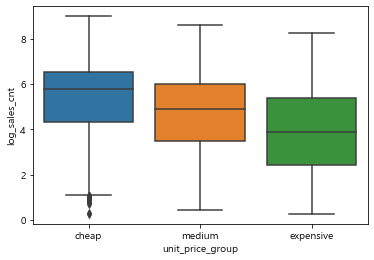

In [20]:
sns.boxplot(data=df_train, x='unit_price_group', y='log_sales_cnt')

In [21]:
list(df_train.product_grp.unique())

['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구', '침구']

In [22]:
df = pd.DataFrame({})
for grp in list(df_train.product_grp.unique()):
    df_part = df_train[df_train.product_grp==grp]
    up = df_part.unit_price
    up_ind = np.digitize(up, bins= [np.percentile(up,33), np.percentile(up,66)])
    df_part['up_ind'] = up_ind
    df = pd.concat([df, df_part])

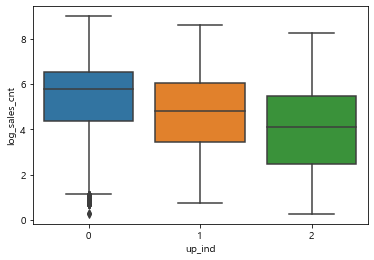

In [23]:
sns.boxplot(data=df, x='up_ind', y='log_sales_cnt')

In [24]:
a = df.unit_price_group.replace('cheap', 0).replace('medium', 1).replace('expensive', 2)
b = df.up_ind

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(a,b)

array([[ 9135,  1948,     0],
       [ 1323,  8768,  1974],
       [    0,   812, 11419]], dtype=int64)

In [90]:
a = pd.DataFrame(g1.product_name.unique())
a.columns = ['product_name_unique']
a.to_csv('product_name_unique.csv', encoding='euc-kr', index=False)